In [1]:
from sklearn.datasets import load_wine
wine = load_wine()

X = wine.data
y = wine.target
feature_names = wine.feature_names

print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [9]:
import numpy as np 
np.unique(y)

array([0, 1, 2])

In [2]:
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### Chi2

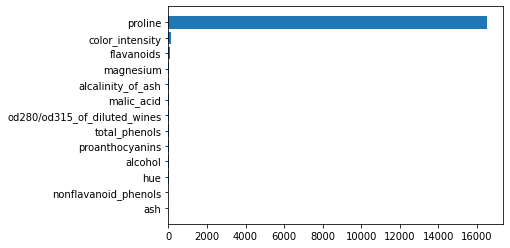

In [68]:
# feature selection
import matplotlib.pyplot as plt 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selected_features = SelectKBest(score_func=chi2, k=6)

selected_features.fit(X, y)

score = pd.DataFrame([selected_features.scores_[i] for i in range(len(feature_names))],index=feature_names,columns=["Score"])
score = score.sort_values(by="Score") 

# plot the scores
plt.barh(score.index, score.Score)
plt.show()

In [55]:
import pandas as pd 
pd.DataFrame(X,columns=feature_names)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


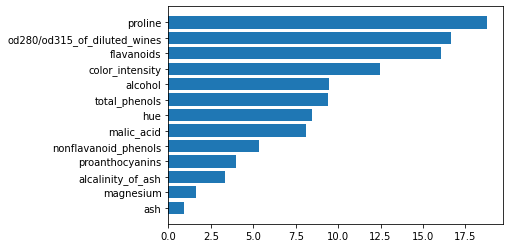

In [57]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)

selected_features = SelectKBest(score_func=chi2, k=6)

selected_features.fit(X_scaled, y)

score = pd.DataFrame([selected_features.scores_[i] for i in range(len(feature_names))],index=feature_names,columns=["Score"])
score = score.sort_values(by="Score") 

# plot the scores
plt.barh(score.index, score.Score)
plt.show()

In [72]:
X_scaled.shape

(178, 13)

In [70]:
selected_features.transform(X_scaled).shape

(178, 6)

### Mutual Info

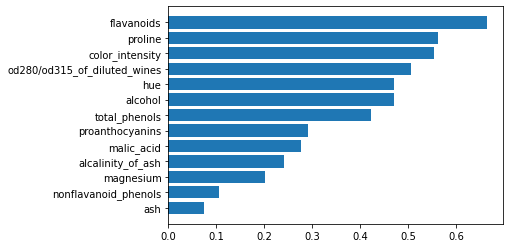

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
selected_features = SelectKBest(score_func=mutual_info_classif, k=6)

selected_features.fit(X, y)

score = pd.DataFrame([selected_features.scores_[i] for i in range(len(feature_names))],index=feature_names,columns=["Score"])
score = score.sort_values(by="Score") 
# plot the scores
plt.barh(score.index, score.Score)
plt.show()

### ANOVA F-statistic

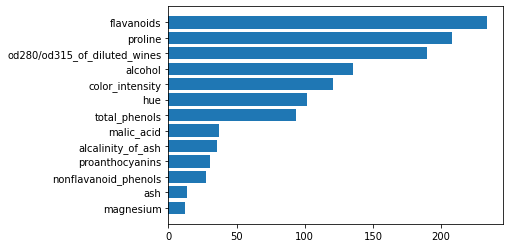

In [59]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
selected_features = SelectKBest(score_func=f_classif, k=6)

selected_features.fit(X, y)

score = pd.DataFrame([selected_features.scores_[i] for i in range(len(feature_names))],index=feature_names,columns=["Score"])
score = score.sort_values(by="Score") 
# plot the scores
plt.barh(score.index, score.Score)
plt.show()

### Decision Tree

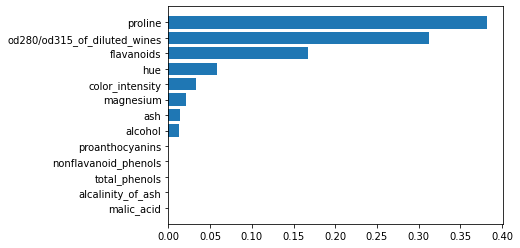

In [66]:
from sklearn.tree import DecisionTreeClassifier

# define the model ## criterion='gini'
model = DecisionTreeClassifier() 

# fit or train the model
model.fit(X,y)

# get importance
importance = model.feature_importances_

score = pd.DataFrame(importance,index=feature_names,columns=["Score"])
score = score.sort_values(by="Score") 
# plot the scores
plt.barh(score.index, score.Score)
plt.show()

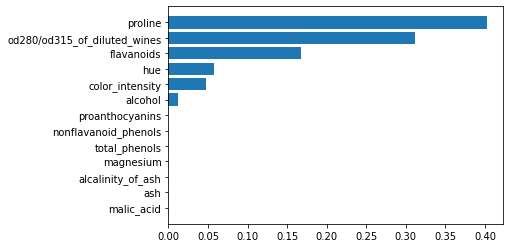

In [65]:
score = pd.DataFrame(importance,index=feature_names,columns=["Score"])
score = score.sort_values(by="Score") 
# plot the scores
plt.barh(score.index, score.Score)
plt.show()

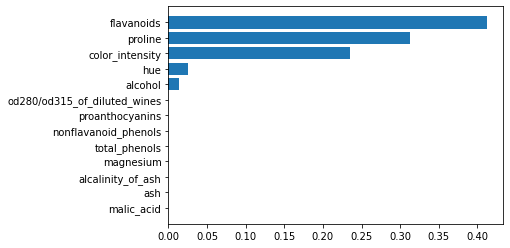

In [67]:
from sklearn.tree import DecisionTreeClassifier

# define the model ## criterion='gini'
model = DecisionTreeClassifier(criterion='entropy') 

# fit or train the model
model.fit(X,y)

# get importance
importance = model.feature_importances_

score = pd.DataFrame(importance,index=feature_names,columns=["Score"])
score = score.sort_values(by="Score") 
# plot the scores
plt.barh(score.index, score.Score)
plt.show()

### RFE

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE 
selected_features = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
selected_features.fit(X,y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [81]:
selected_features

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [89]:
score = pd.DataFrame([(selected_features.support_[i],selected_features.ranking_[i]) for i in range(len(feature_names))],feature_names,columns=["support","rank"])
score = score.sort_values(by="rank") 
score

,support,rank
flavanoids,True,1
color_intensity,True,1
hue,True,1
od280/od315_of_diluted_wines,True,1
proline,True,1
magnesium,False,2
alcohol,False,3
proanthocyanins,False,4
nonflavanoid_phenols,False,5
total_phenols,False,6


### Squential forward/backward selection
- Using scikit or mlextend